In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Step 2: Load the dataset
file_path = 'Banking data.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(file_path, sheet_name='bank-full')

In [20]:
# Step 3: Display the first few rows of the dataset to understand its structure
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Step 4: Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Step 5: Display summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

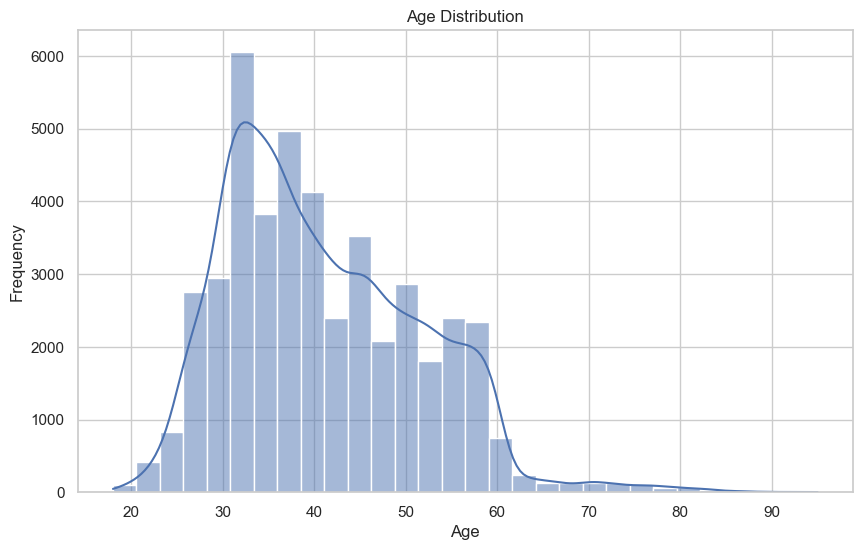

In [15]:
# Step 7: Plotting the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

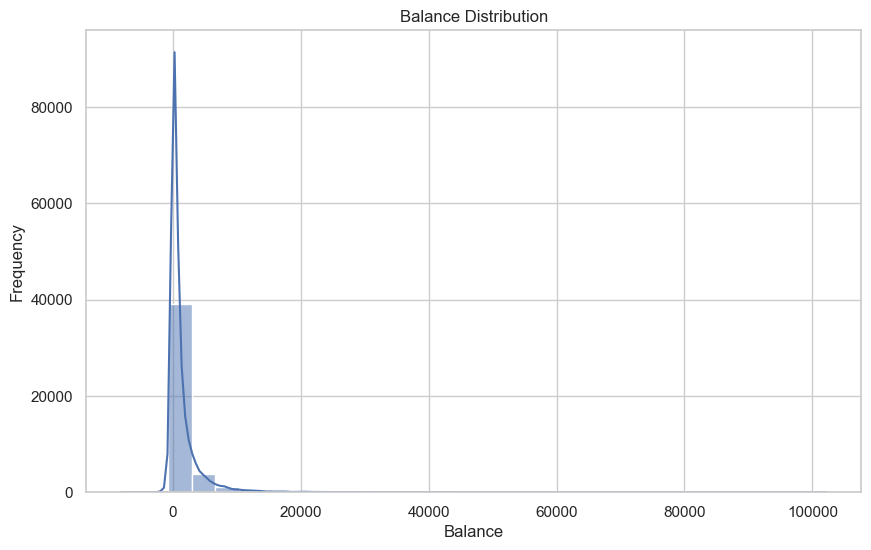

In [16]:
# Step 8: Checking the distribution of 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

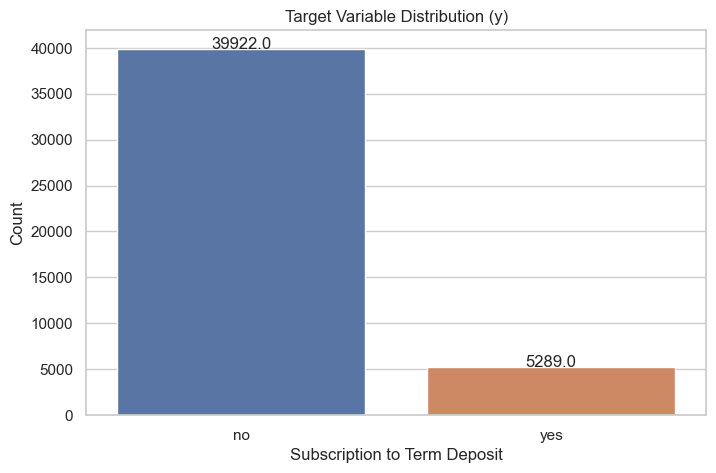

In [17]:
# Step 9: Count plot for the target variable 'y'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Target Variable Distribution (y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

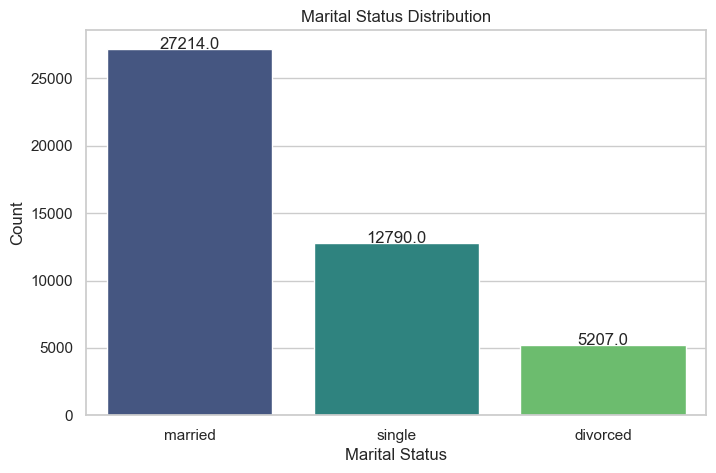

In [18]:
# Step 10: Count plot for marital status
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='marital', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

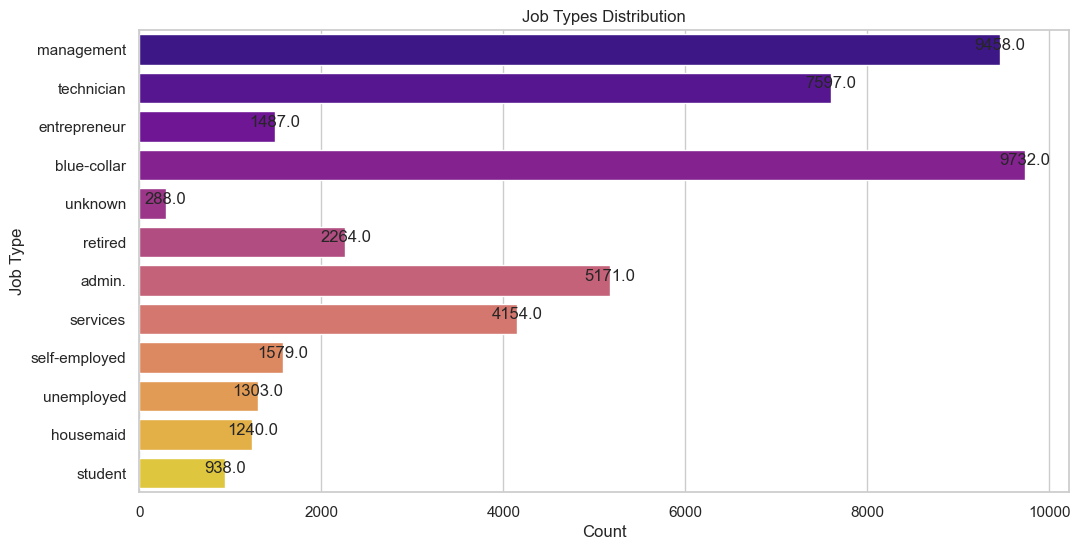

In [19]:
# Step 11: Count plot for job types
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='job', data=df, palette='plasma')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='baseline')
plt.title('Job Types Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

In [11]:
# Step 12: Encode categorical variables for correlation analysis
le = LabelEncoder()
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

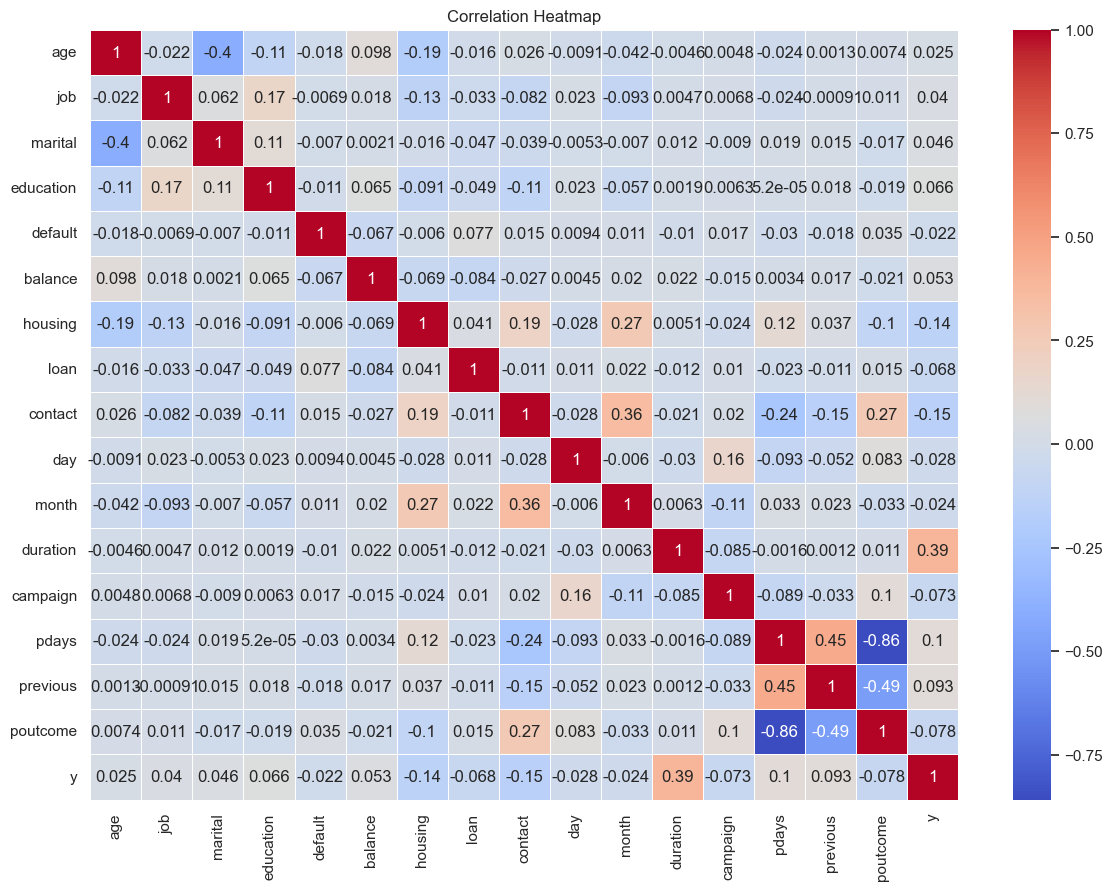

In [12]:
# Step 13: Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Step 14: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Step 15: Prepare features (X) and target variable (y) for feature selection
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Step 16: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 17: Apply SelectKBest to select the top 10 features based on the ANOVA F-value test
select_k_best = SelectKBest(score_func=f_classif, k=10)
fit = select_k_best.fit(X, y)

# Step 18: Create a DataFrame to view feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
selected_features = feature_scores.sort_values(by='Score', ascending=False).head(10)

# Step 19: Display the top 10 features
print(selected_features)

      Feature        Score
11   duration  8333.761148
8     contact  1017.965930
6     housing   892.950576
13      pdays   490.696563
14   previous   396.443989
15   poutcome   275.596872
12   campaign   243.358404
7        loan   211.167395
3   education   199.242825
5     balance   126.572276
